<a href="https://colab.research.google.com/github/Saket8538/Bharat-Intern-Task-1-SMS-Classifier/blob/main/SMS_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
from IPython.display import Image

In [2]:
uploded = files.upload()

Saving Task1.jpg to Task1.jpg


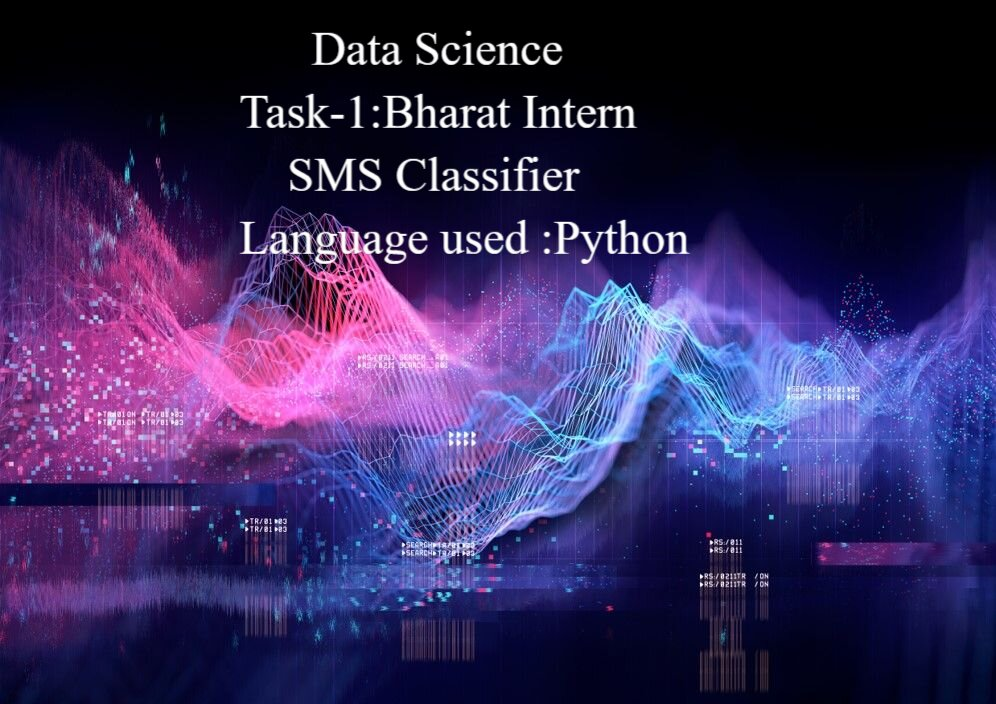

In [3]:
Image( 'Task1.jpg',
       width =400)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [6]:
data = data[['v1', 'v2']]

In [7]:
data.columns = ['label', 'message']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

In [9]:
vectorizer = CountVectorizer(stop_words='english')

In [10]:
X_train_vec = vectorizer.fit_transform(X_train)

In [11]:
X_test_vec = vectorizer.transform(X_test)

In [12]:
model = MultinomialNB()

In [13]:
 model.fit(X_train_vec, y_train)

MultinomialNB()

In [14]:
y_pred = model.predict(X_test_vec)

In [15]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9838565022421525


In [16]:
print(confusion_matrix(y_test, y_pred))

[[959   6]
 [ 12 138]]


In [17]:
new_messages = ['Free entry in 2 a wkly comp', 'Hey, are you coming to the party tonight?']

In [18]:
new_messages_vec = vectorizer.transform(new_messages)

In [19]:
print(model.predict(new_messages_vec))

['spam' 'ham']
